# **Blizzard Employee Voluntary Salary Exploratoy Data Analysis**

 ---

## **Context**
 Blizzard Entertainment, Inc. is a prominent American video game developer and publisher located in Irvine, California, and operates as a subsidiary of Activision Blizzard.
 Established in 1991, the company is renowned for its creation of the influential MMORPG World of Warcraft (2004) and successful franchises such as Diablo, StarCraft, and Overwatch.
 Blizzard also runs Battle.net, an online gaming platform [1].

 In 2020, employees at Blizzard have taken steps to address concerns regarding wage disparities by circulating an anonymous spreadsheet detailing salaries and pay increases.
 This initiative reflects growing discontent within the company, particularly following a 2019 internal survey that revealed significant dissatisfaction with compensation among staff [2].

 <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Blizzard_Entertainment_Logo_2015.svg/1200px-Blizzard_Entertainment_Logo_2015.svg.png" width="300" height="156.25">

## **Objective**
 This analysis aims to explore the salary data shared by employees to uncover patterns and insights related to compensation equity across different roles within Blizzard.

## **Dictionary**

 **Description**

 Employee generated anonymous survey of salary information [3, 4, 5].

 | column                      |  description                                       |
 | :-----------------------:   |:-----------------------:                           |
 | timestamp                   |Time data was entered                               |
 | status                      |Specifies employment status                         |
 | current_title               |Current job title                                   |
 | current_salary              |Current salary (in USD)                             |
 | salary_type                 |Frequency with levels year, hour, week              |
 | percent_incr                |Raise given July 2020                               |
 | other_info                  |Other information submitted by employee             |
 | location                    |Current office of employment                        |
 | performance_rating          |Most recent review performance rating               |

## **Exploratory Data Analysis**

### **Libraries Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

### **Data Load**

In [ ]:
# Read the CSV file containing Blizzard employee salary data
df_blizzard_salary = pd.read_csv('./data/blizzard_salary.csv')

### **Dataframe infos**

In [ ]:
# Display memory usage information of the DataFrame
df_blizzard_salary.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           466 non-null    object 
 1   status              466 non-null    object 
 2   current_title       451 non-null    object 
 3   current_salary      410 non-null    float64
 4   salary_type         466 non-null    object 
 5   percent_incr        422 non-null    float64
 6   other_info          169 non-null    object 
 7   location            463 non-null    object 
 8   performance_rating  336 non-null    object 
dtypes: float64(2), object(7)
memory usage: 202.2 KB


In [ ]:
# Check the dimensions of the DataFrame
df_blizzard_salary.shape

(466, 9)

In [ ]:
# Show the first few rows for a quick overview
df_blizzard_salary.head()

,timestamp,status,current_title,current_salary,salary_type,percent_incr,other_info,location,performance_rating
0,8/6/20 18:57,Full Time Employee,Consultant,1.00,year,1.0,NaN,Irvine,High
1,8/6/20 18:56,Full Time Employee,Engineer,1.00,year,1.0,NaN,Irvine,Successful
2,8/6/20 18:56,Full Time Employee,Engineer,1.00,year,1.0,NaN,Irvine,High
3,7/31/20 16:50,Full Time Employee,Customer Support,16.34,hour,1.0,Near smack dab in the middle of my pay band,Austin,Successful
4,3/11/21 10:28,Full Time Employee,Game Master,16.73,hour,NaN,NaN,Austin,High


In [ ]:
# List all column names
df_blizzard_salary.columns

Index(['timestamp', 'status', 'current_title', 'current_salary', 'salary_type',
       'percent_incr', 'other_info', 'location', 'performance_rating'],
      dtype='object')

In [ ]:
# Show detailed information including non-null counts and data types
df_blizzard_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           466 non-null    object 
 1   status              466 non-null    object 
 2   current_title       451 non-null    object 
 3   current_salary      410 non-null    float64
 4   salary_type         466 non-null    object 
 5   percent_incr        422 non-null    float64
 6   other_info          169 non-null    object 
 7   location            463 non-null    object 
 8   performance_rating  336 non-null    object 
dtypes: float64(2), object(7)
memory usage: 32.9+ KB


In [ ]:
# Display data types of each column
df_blizzard_salary.dtypes

timestamp              object
status                 object
current_title          object
current_salary        float64
salary_type            object
percent_incr          float64
other_info             object
location               object
performance_rating     object
dtype: object

In [ ]:
# Provide descriptive statistics for numerical columns
df_blizzard_salary.describe()

,current_salary,percent_incr
count,410.000000,422.000000
mean,76114.036171,3.240498
std,50184.361799,3.615827
min,1.000000,0.000000
25%,41313.500000,1.200000
50%,75000.000000,2.500000
75%,112962.500000,3.500000
max,216856.000000,21.500000


### **Understanding Variables**

#### **Categorical Variables**

**Status**

 The 'status' column has two contract options: Full Time Employee and Contractor
 Full Time Employee refers to conventional employment (similar to CLT in Brazil), while Contractor resembles freelance work [6].

In [ ]:
# This displays unique employment statuses
print(df_blizzard_salary['status'].unique())

['Full Time Employee' 'Contractor']


In [ ]:
# This displays employment statuses by status proportion
print(df_blizzard_salary['status'].value_counts(normalize=True))

status
Full Time Employee    0.963519
Contractor            0.036481
Name: proportion, dtype: float64


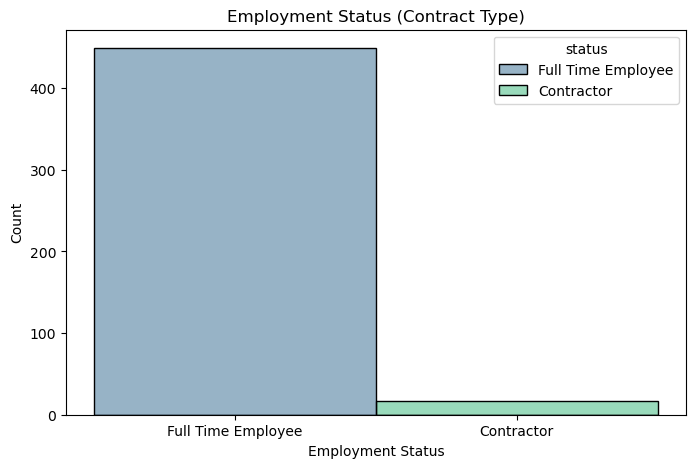

In [ ]:
# Visualization of employment status distribution using a histogram
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

sns.histplot(data=df_blizzard_salary,
             x=df_blizzard_salary['status'],
             hue=df_blizzard_salary['status'],
             palette='viridis')

plt.title('Employment Status (Contract Type)')
plt.xlabel('Employment Status')

plt.show()

**Current Title**

 The Current Title column represents employee job titles with 202 unique values.
 Notable inconsistencies include:
 1. Lack of standardization in job levels (e.g., I vs. 1).
 2. Inconsistencies in seniority descriptors (e.g., Sr. vs. Senior).
 3. Non-standardized job titles (e.g., 'Customer Support Specialist Game Master' vs 'Game Master').
 4. Incomplete entries (e.g., 'Senior 1', 'X', or 'Can't say').

In [ ]:
# This counts occurrences of each job title
print(df_blizzard_salary['current_title'].value_counts())

current_title
Test Analyst                                         35
Software Engineer                                    26
Senior Software Engineer I                           24
Specialist Game Master                               21
Game Master                                          11
                                                     ..
Associate Manager                                     1
Associate Character Artist                            1
analyst                                               1
Analyst, Threat Intelligence and Partner Services     1
CS Supervisor                                         1
Name: count, Length: 202, dtype: int64


In [ ]:
# Get the top 20 most common job titles
top_titles = df_blizzard_salary['current_title'].value_counts().nlargest(20)

In [ ]:
# Sort the DataFrame by current title
df_blizzard_salary_sorted = df_blizzard_salary.sort_values(by='current_title')

print(df_blizzard_salary_sorted['current_title'].unique())

['3D Artist' '3d Artist(character)' '3d artist' 'Analyst'
 'Analyst, Threat Intelligence and Partner Services' 'Animator' 'Artist'
 'Assistant Digital Marketing Manager' 'Assistant Editor'
 'Associate 3D Artist' 'Associate 3D Artist (Character Artist)'
 'Associate Artist' 'Associate Brand Manager' 'Associate Character Artist'
 'Associate Concept Artist' 'Associate Data Analyst'
 'Associate Data Engineer' 'Associate Data Scientist'
 'Associate Environment Artist' 'Associate Esports Manager'
 'Associate Game Designer' 'Associate Game Producer'
 'Associate Gameplay Engineer' 'Associate Manager'
 'Associate Operations Admin' 'Associate Operations Administrator'
 'Associate Operations Engineer' 'Associate Operations Manager'
 'Associate PM (my range is on the same scale as PM, but not my actual title)'
 'Associate Producer' 'Associate Product Manager'
 'Associate Program Manager' 'Associate QA Analyst'
 'Associate Site Reliability Engineer'
 'Associate Software Developer Engineer in Test'
 

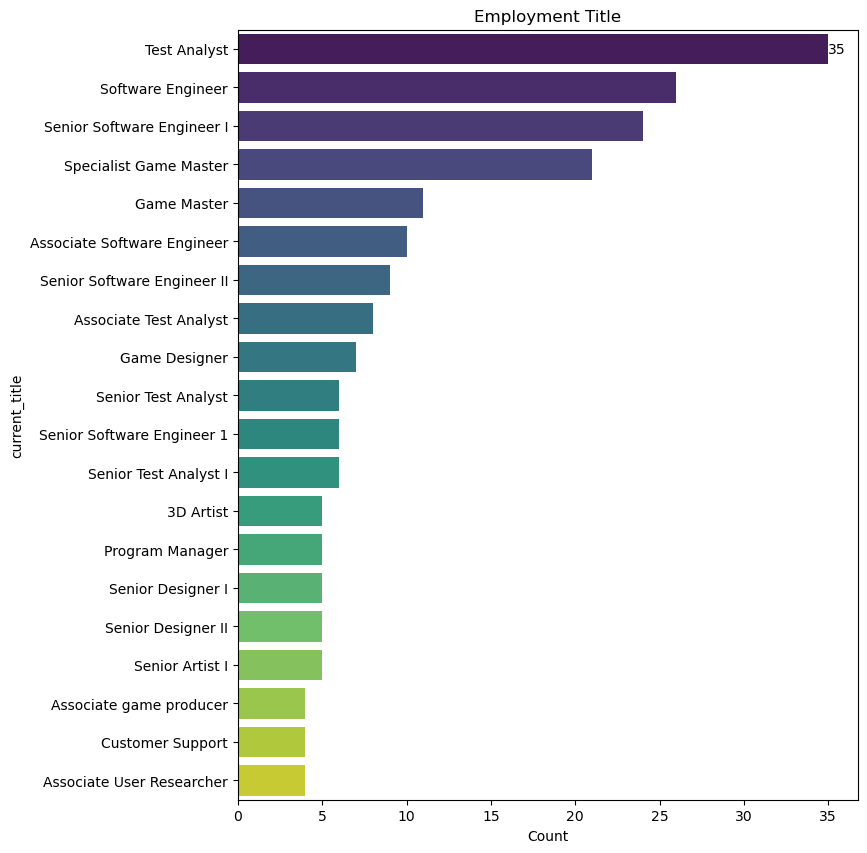

In [ ]:
# Visualization of job title distribution using a bar plot
fig, axs = plt.subplots(1, 1, figsize = (8, 10))

sns.barplot(x=top_titles.values,
            y=top_titles.index,
            hue=top_titles.index,
            palette='viridis',
            errorbar=None)

axs.bar_label(axs.containers[0], fontsize=10)

plt.title('Employment Title')
plt.xlabel('Count') 

plt.show()

**Salary Type**

 In Salary Type, there are three methods for calculating salary: annually, weekly, and hourly.
 Different calculation methods impact the values in 'current_salary', necessitating standardization.

In [ ]:
# This counts occurrences of each salary type
print(df_blizzard_salary['salary_type'].value_counts())

salary_type
year    402
hour     63
week      1
Name: count, dtype: int64


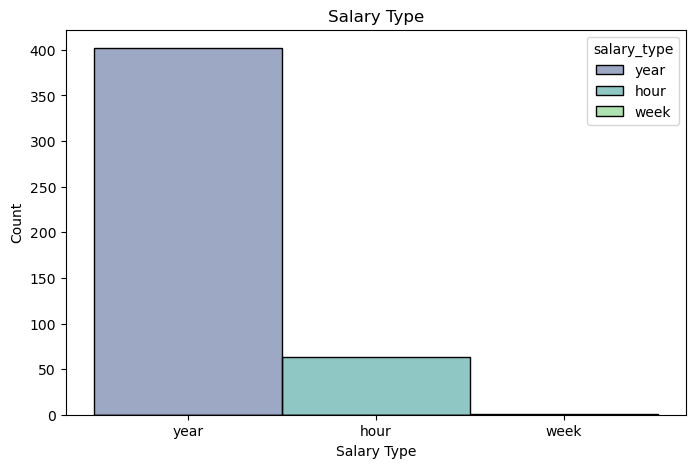

In [ ]:
# Visualization of salary type distribution using a histogram
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

sns.histplot(data=df_blizzard_salary,
             x=df_blizzard_salary['salary_type'],
             hue=df_blizzard_salary['salary_type'],
             palette='viridis')

plt.title('Salary Type')
plt.xlabel('Salary Type')

plt.show()

**Location**

 In Location, employees recorded their base allocations with some inconsistencies:
 - Variations in city names (e.g., 'Los Angeles Center Studios' vs 'Los Angeles').
 - Case sensitivity issues (e.g., 'Versailles' vs 'versailles').

In [ ]:
# This counts occurrences of each location entry
print(df_blizzard_salary['location'].value_counts())

location
Irvine                        374
Austin                         35
Cork                           24
Versailles                     18
Los Angeles                     4
Los Angeles Center Studios      2
versailles                      1
New York                        1
Laid off 3/16                   1
The Hague                       1
santa monica                    1
Work From Home - Virginia       1
Name: count, dtype: int64


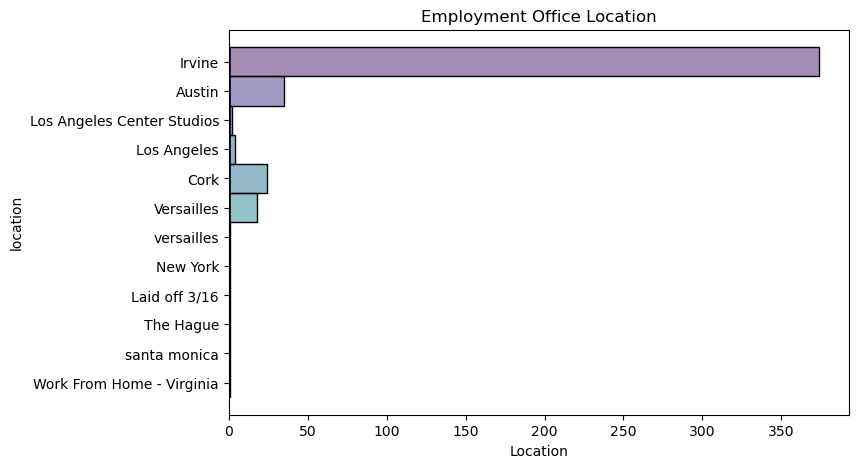

In [ ]:
# Visualization of location distribution using a histogram
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

sns.histplot(data=df_blizzard_salary,
             y=df_blizzard_salary['location'],
             hue=df_blizzard_salary['location'],
             palette='viridis',
             legend=False)

plt.title('Employment Office Location')
plt.xlabel('Location')

plt.show()

**Performance Rating**

 In **Performance Rating**, we have the classification of the last performance evaluation of employees, considering (from worst to best performance):
 1. 'developing'
 2. 'successful'
 3. 'high'
 4. 'top'

In [ ]:
# This counts occurrences of each performance rating entry
print(df_blizzard_salary['performance_rating'].value_counts())

performance_rating
Successful    178
High          127
Top            24
Developing      7
Name: count, dtype: int64


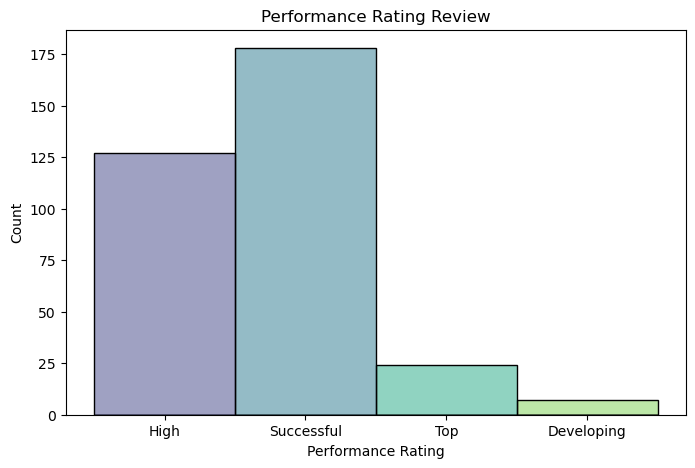

In [ ]:
# Visualization of performance ratings distribution using a histogram
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

sns.histplot(data=df_blizzard_salary,
             x=df_blizzard_salary['performance_rating'],
             hue=df_blizzard_salary['performance_rating'],
             palette='viridis',
             legend=False)

plt.title('Performance Rating Review')
plt.xlabel('Performance Rating')

plt.show()

#### **Numerical Variables**

**Current Salary**

 In this variable, we have the amounts declared by employees in USD.
 As noted in the Salary Type variable, the declared amount can be annual, weekly, or hourly.
 The histogram shows a large number of values close to zero, which does not make much sense when considering annual salaries.
 Therefore, it will be necessary to standardize the salaries of these employees to a common basis for meaningful comparison.

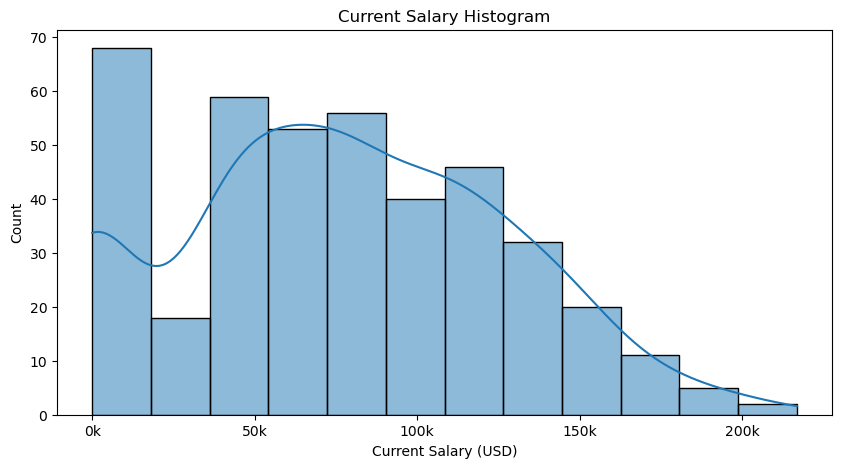

In [ ]:
# Visualization of current salary distribution using a histogram
fig, axs = plt.subplots(1, 1, figsize = (10, 5))

sns.histplot(df_blizzard_salary['current_salary'],
             kde = True)

axs.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.title('Current Salary Histogram')
plt.xlabel('Current Salary (USD)')

plt.show()

In [ ]:
# Create a new DataFrame containing only employees whose salary type is annual
df_current_salary_year = df_blizzard_salary[df_blizzard_salary['salary_type'] == 'year'].copy()

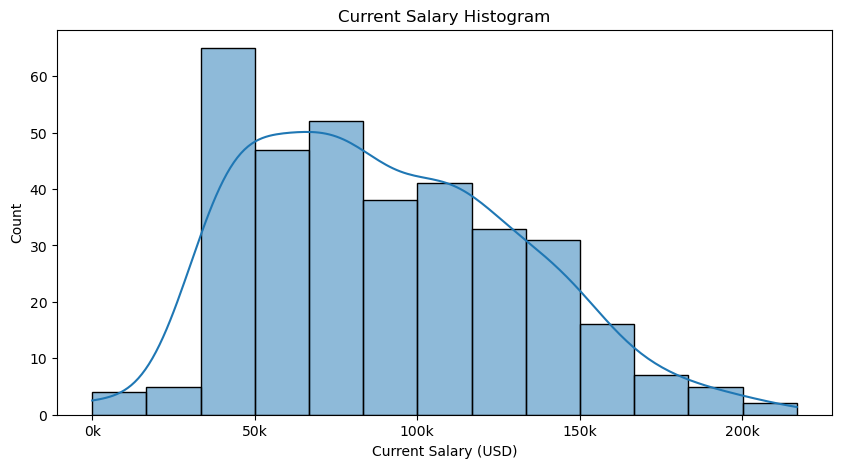

In [ ]:
# Visualization of current salary distribution for annual salaries using a histogram
fig, axs = plt.subplots(1, 1, figsize = (10, 5))

sns.histplot(df_current_salary_year['current_salary'],
             kde = True)

axs.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.title('Current Salary Histogram')
plt.xlabel('Current Salary (USD)')

plt.show()

In [ ]:
# Display the smallest current salaries
smallest_salaries = df_blizzard_salary['current_salary'].nsmallest(20)
smallest_salaries_year = df_current_salary_year['current_salary'].nsmallest(20)

print(smallest_salaries)
print(smallest_salaries_year)

0      1.00
1      1.00
2      1.00
3     16.34
4     16.73
5     17.00
6     18.00
7     18.18
8     19.76
9     20.35
10    20.38
11    20.44
12    20.53
13    21.63
14    21.88
15    21.88
16    22.27
17    23.00
18    23.37
19    23.37
Name: current_salary, dtype: float64
0         1.00
1         1.00
2         1.00
37       26.61
68    28000.00
69    30500.00
70    31803.00
71    32178.00
72    33300.00
73    33500.00
74    33987.00
75    34000.00
76    34486.00
77    34568.00
78    34798.00
79    35000.00
80    35760.00
81    35793.00
82    35795.00
83    35903.00
Name: current_salary, dtype: float64


In [ ]:
# Sort and display current titles with their salary type and current salary
print(df_blizzard_salary[['current_title', 'salary_type', 'current_salary']].sort_values)
print(df_current_salary_year[['current_title', 'salary_type', 'current_salary']].sort_values)

<bound method DataFrame.sort_values of               current_title salary_type  current_salary
0                Consultant        year            1.00
1                  Engineer        year            1.00
2                  Engineer        year            1.00
3          Customer Support        hour           16.34
4               Game Master        hour           16.73
..                      ...         ...             ...
461  Specialist Game Master        year        43465.00
462           CS Supervisor        year        54787.00
463  Senior Project Manager        year        65745.00
464                     NaN        year        84008.00
465           Game Designer        year        87298.00

[466 rows x 3 columns]>
<bound method DataFrame.sort_values of               current_title salary_type  current_salary
0                Consultant        year            1.00
1                  Engineer        year            1.00
2                  Engineer        year            1.00
3

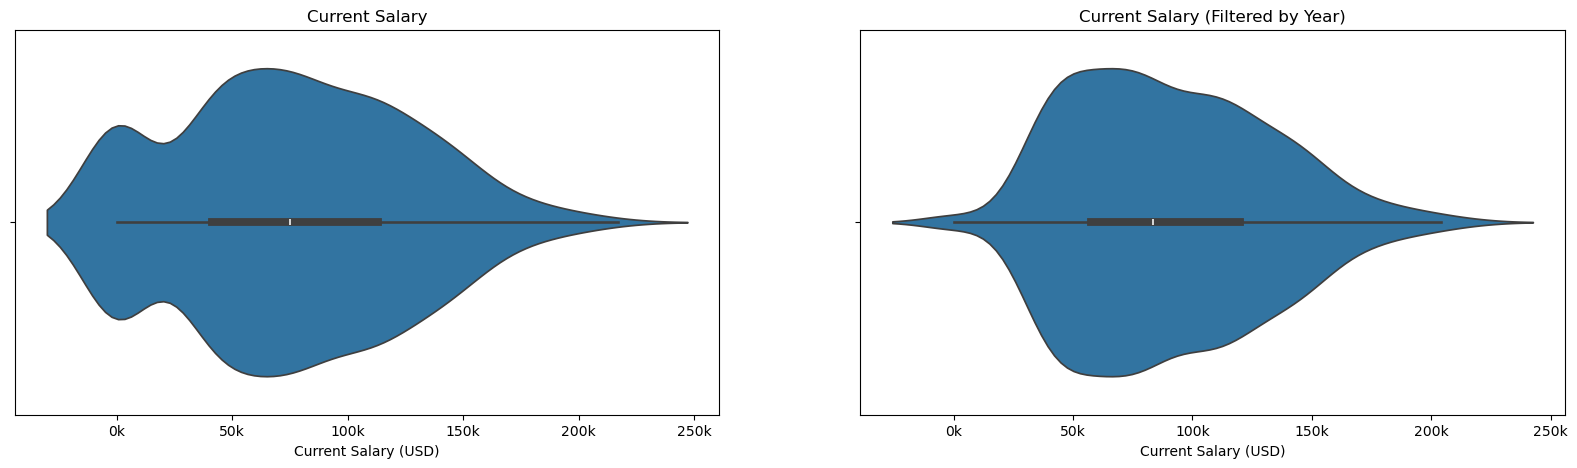

In [ ]:
# Visualization of current salary distributions using violin plots
fig, axs = plt.subplots(1, 2, figsize = (20, 5))

sns.violinplot(x=df_blizzard_salary['current_salary'], ax=axs[0])
axs[0].set_title('Current Salary')
axs[0].set_xlabel('Current Salary (USD)')
axs[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

sns.violinplot(x=df_current_salary_year['current_salary'], ax=axs[1])
axs[1].set_title('Current Salary (Filtered by Year)')
axs[1].set_xlabel('Current Salary (USD)')
axs[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.show()

**Percent Increase**

 In this variable, we have the percentage increase that employees received in 2020.

In [ ]:
# Display the normalized value counts of percentage increases
df_blizzard_salary['percent_incr'].value_counts(normalize=True)*100

percent_incr
3.00     12.085308
2.00     11.848341
1.00     11.137441
0.00     10.663507
2.50     10.189573
1.20      6.161137
3.50      4.502370
4.00      3.791469
10.00     3.080569
1.50      2.843602
1.30      2.843602
4.50      1.895735
5.00      1.421801
2.30      0.947867
2.20      0.947867
12.00     0.947867
6.00      0.710900
8.00      0.710900
2.90      0.710900
11.00     0.710900
2.70      0.710900
2.10      0.473934
15.00     0.473934
13.00     0.473934
2.80      0.473934
16.00     0.473934
20.00     0.473934
17.00     0.473934
5.40      0.473934
3.10      0.473934
1.26      0.473934
2.40      0.236967
3.90      0.236967
13.50     0.236967
3.70      0.236967
1.80      0.236967
3.20      0.236967
0.50      0.236967
14.00     0.236967
18.60     0.236967
18.00     0.236967
2.60      0.236967
21.50     0.236967
1.25      0.236967
11.30     0.236967
0.02      0.236967
7.30      0.236967
7.00      0.236967
7.40      0.236967
12.80     0.236967
9.50      0.236967
10.50     0.236967

In [ ]:
# Provide descriptive statistics for the percentage increase
df_blizzard_salary['percent_incr'].describe()

count    422.000000
mean       3.240498
std        3.615827
min        0.000000
25%        1.200000
50%        2.500000
75%        3.500000
max       21.500000
Name: percent_incr, dtype: float64

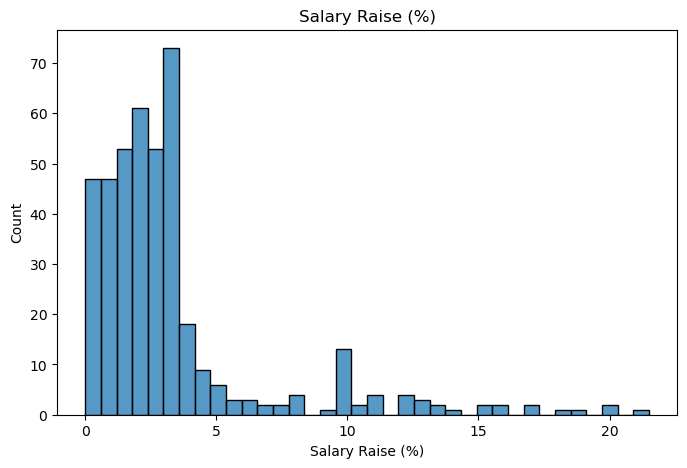

In [ ]:
# Visualization of salary raise distribution using a histogram
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

sns.histplot(data=df_blizzard_salary['percent_incr'])

plt.title('Salary Raise (%)')
plt.xlabel('Salary Raise (%)')

plt.show()

### **Data Cleaning and Curation**
##### Treatment of current_title

In [ ]:
# act = adjusted current title
# Create a copy of the original DataFrame for adjustments
df_blizzard_salary_act = df_blizzard_salary.copy()

# Drop rows where 'current_salary' is NaN
df_blizzard_salary_act = df_blizzard_salary_act.dropna(subset=['current_salary'])

# Drop rows where 'current_title' is NaN
df_blizzard_salary_act = df_blizzard_salary_act.dropna(subset=['current_title'])

# Create a new column 'adjusted_title' with lowercase titles
df_blizzard_salary_act['adjusted_title'] = df_blizzard_salary_act['current_title'].str.lower()

# Reorder columns in the DataFrame
colunas = ['timestamp', 'status', 'current_title', 'adjusted_title',
           'current_salary', 'salary_type', 'percent_incr', 'other_info',
           'location', 'performance_rating']

df_blizzard_salary_act = df_blizzard_salary_act.reindex(colunas, axis=1)

In [ ]:
df_blizzard_salary_act.head()

,timestamp,status,current_title,adjusted_title,current_salary,salary_type,percent_incr,other_info,location,performance_rating
0,8/6/20 18:57,Full Time Employee,Consultant,consultant,1.00,year,1.0,NaN,Irvine,High
1,8/6/20 18:56,Full Time Employee,Engineer,engineer,1.00,year,1.0,NaN,Irvine,Successful
2,8/6/20 18:56,Full Time Employee,Engineer,engineer,1.00,year,1.0,NaN,Irvine,High
3,7/31/20 16:50,Full Time Employee,Customer Support,customer support,16.34,hour,1.0,Near smack dab in the middle of my pay band,Austin,Successful
4,3/11/21 10:28,Full Time Employee,Game Master,game master,16.73,hour,NaN,NaN,Austin,High


In [ ]:
# Function to Replace Terms Using Regex
def replace_terms(DataFrame, columns, replacements):
    for col in columns:
        for oldvalue, newvalue in replacements.items():
            DataFrame[col] = DataFrame[col].str.replace(oldvalue, newvalue, regex=True)

# Substitution Dictionary
replacements_title = {
    # Drop Incomplete entries
    r'\bx\b': '',
    r'\bposition in ii tier\b': '',
    r".*can't say \(loss of anonimity\).*": '',
    r'\bchoose not to disclose\b': '',
    r'\bsenior i\b': '',

    # Inconsistencies in seniority descriptors
    r'\bsr\.': 'senior',
    r'\bsenor': 'senior',

    # Lack of standardization in job levels
    r'\b1': 'i',
    r'\b2': 'ii',

    # Non-standardized job titles
    r'.*senior software egr i\.\-.*': 'senior software engineer i',
    r'.*associate pm \(my range is on the same scale as pm, but not my actual title\)*': 'associate pm',
    r'.*principle*': 'principal',
    r'.*3d artist\(character\)*': '3d artist (character artist)',
    r'.*ui \/ux designer*': 'ui/ux designer',
    r'.*associate software development engineer in test*': 'associate software developer engineer in test',
    r'\bqa\b(?!\s\w)': 'qa analyst',
}

# Applying Replacements
replace_terms(df_blizzard_salary_act, ['adjusted_title'], replacements_title)

In [ ]:
# Check specific adjusted titles
df_blizzard_salary_act[df_blizzard_salary_act['adjusted_title'].str.contains(r".*qa.*", na=False)]['adjusted_title']

# ##### Treatment of location

14     associate qa analyst
18               qa analyst
25               qa analyst
125              qa analyst
142       senior qa analyst
206     senior qa analyst i
Name: adjusted_title, dtype: object

In [ ]:
# Convert all location entries to lowercase
df_blizzard_salary_act['location'] = df_blizzard_salary_act['location'].str.lower()
df_blizzard_salary_act['location'].value_counts()

location
irvine                        314
austin                         32
cork                           23
versailles                     16
los angeles center studios      2
los angeles                     2
new york                        1
laid off 3/16                   1
the hague                       1
santa monica                    1
work from home - virginia       1
Name: count, dtype: int64

In [ ]:
# Drop rows where 'location' is 'laid off 3/16'
df_blizzard_salary_act = df_blizzard_salary_act.drop(df_blizzard_salary_act[df_blizzard_salary_act['location'] == 'laid off 3/16'].index)

In [ ]:
# Substitution Dictionary
replacements_location = {
    # Non-standardized location
    r'.*los angeles center studios.*': 'los angeles',
    r'.*work from home - virginia*': 'virginia',
}

# Applying Replacements
replace_terms(df_blizzard_salary_act, ['location'], replacements_location)

##### Treatment of performance_rating

In [ ]:
# Convert all performance_rating entries to lowercase
df_blizzard_salary_act['performance_rating'] = df_blizzard_salary_act['performance_rating'].str.lower()
df_blizzard_salary_act['performance_rating'].value_counts()

performance_rating
successful    156
high          101
top            22
developing      5
Name: count, dtype: int64

In [ ]:
# Substitution Dictionary
replacements_performance_rating = {
    # Non-standardized location
    r'.*developing.*': '1-developing',
    r'.*successful.*': '2-successful',
    r'.*high.*': '3-high',
    r'.*top.*': '4-top',
}

# Applying Replacements
replace_terms(df_blizzard_salary_act, ['performance_rating'], replacements_performance_rating)

##### Treatment of current_salary
 To estimate the salary of users who reported hourly/weekly wages, the following formula was used:
 Annual Salary = Hourly Rate × Hours per Week × Weeks per Year

In [ ]:
# Create a new column 'adjusted_salary'
df_blizzard_salary_act['adjusted_salary'] = df_blizzard_salary_act['current_salary']

colunas = ['timestamp', 'status', 'current_title', 'adjusted_title', 'current_salary', 'adjusted_salary', 'salary_type',
       'percent_incr', 'other_info', 'location', 'performance_rating']

df_blizzard_salary_act = df_blizzard_salary_act.reindex(colunas, axis=1)

In [ ]:
# Function to Adjust Salary Based on Type
def adjust_salary(row):
    if row['salary_type'] == 'year':
        return row['current_salary']
    elif row['salary_type'] == 'weekly':
        return row['current_salary'] * 52
    elif row['salary_type'] == 'hour':
        return row['current_salary'] * 40 * 52
    else:
        return 0.0
    
pd.options.display.float_format = '{:,.2f}'.format

df_blizzard_salary_act['adjusted_salary'] = df_blizzard_salary_act.apply(adjust_salary, axis=1)

In [ ]:
# Check adjusted salaries
df_blizzard_salary_act = df_blizzard_salary_act.drop(df_blizzard_salary_act[(df_blizzard_salary_act['adjusted_salary'] < 100)].index)

df_blizzard_salary_act = df_blizzard_salary_act.dropna(subset=['adjusted_salary'])

In [ ]:
df_blizzard_salary_vf = df_blizzard_salary_act

#### **Exploring Relationships Between Variables**

**What are the highest- and lowest-paying positions?**

 In the top 5 salaries, there are 3 positions within the **software engineering** function.
 Software engineers design, develop, test, and maintain software.
 They gather requirements, plan architecture, write code, ensure quality, and support software post-launch.
 They also collaborate with teams and document their work to keep projects aligned with user needs.
 Software engineering is a high-paid role because it requires specialized
 skills, critical thinking, and a deep understanding of technology to build complex,
 reliable systems that meet specific business or user needs.

In [ ]:
# Calculate top/bottom average salary
top_10_salaries = df_blizzard_salary_vf.groupby(['adjusted_title'])['adjusted_salary'].mean().sort_values(ascending=False).nlargest(10)

bottom_10_salaries = df_blizzard_salary_vf.groupby(['adjusted_title'])['adjusted_salary'].mean().sort_values(ascending=False).nsmallest(10)

top_salary = df_blizzard_salary_vf.groupby(['adjusted_title'])['adjusted_salary'].mean().sort_values(ascending=False).nlargest(1)

bottom_salary = df_blizzard_salary_vf.groupby(['adjusted_title'])['adjusted_salary'].mean().sort_values(ascending=False).nsmallest(1)

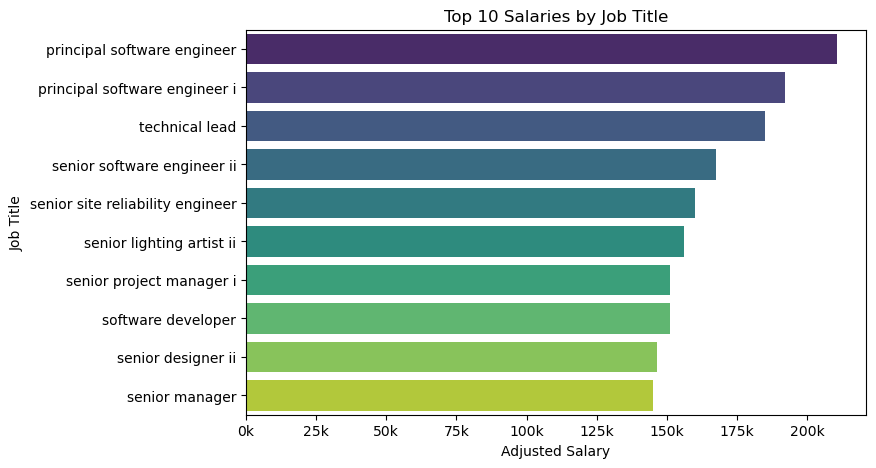

In [ ]:
# Visualization of top salaries by job title
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

sns.barplot(x=top_10_salaries.values,
            y=top_10_salaries.index,
            hue=top_10_salaries.index,
            palette='viridis',
            errorbar=None)

axs.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.title('Top 10 Salaries by Job Title')
plt.xlabel('Adjusted Salary')
plt.ylabel('Job Title')

plt.show()

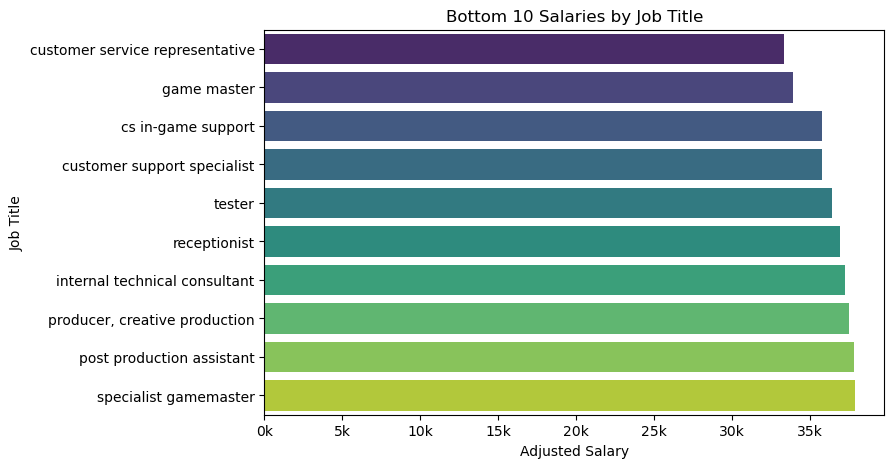

In [ ]:
# Visualization of bottom salaries by job title
fig, axs = plt.subplots(1, 1, figsize = (8, 5))

sns.barplot(x=bottom_10_salaries.values,
            y=bottom_10_salaries.index,
            hue=bottom_10_salaries.index,
            palette='viridis',
            errorbar=None)

axs.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.title('Bottom 10 Salaries by Job Title')
plt.xlabel('Adjusted Salary')
plt.ylabel('Job Title')

plt.show()

In [ ]:
# Calculate the percentage difference between top and bottom salary
delta_top_bottom = ((top_salary[0] / bottom_salary[0]) - 1) * 100

# Format the output
formatted_output = f"The difference between the lowest and highest salary is {delta_top_bottom:.2f} %"
print(formatted_output)

The difference between the lowest and highest salary is 531.92 %


<ipython-input-48-c6308d069a5c>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  delta_top_bottom = ((top_salary[0] / bottom_salary[0]) - 1) * 100


**Do Software Engineers have higher salary increase percentages and performance levels than other positions?**

 In general, salary increase percentages in software engineering are higher than in other positions.
 However, when it comes to performance, the difference is not as significant.
 We have more software engineers mainly in the "Developing" stage.

 Higher salary increases in software engineering are often driven by high demand, market expectations, and retention strategies, rather than performance alone.
 The focus in software engineering is often on technical development, with many engineers still in the "Developing" stage.
 Additionally, the complexity of measuring performance and the need for continuous learning contribute to these higher increases without necessarily reflecting higher performance levels compared to other fields.

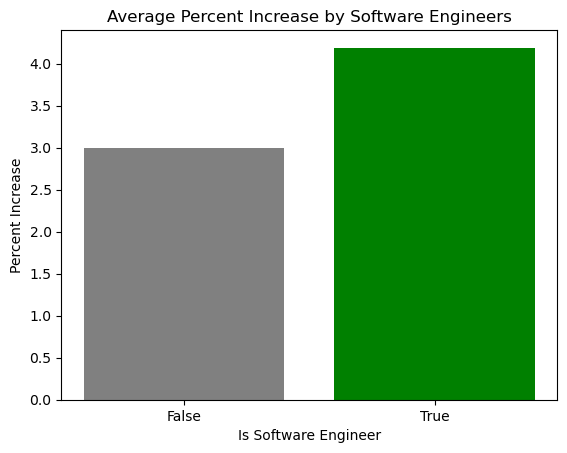

In [ ]:
# Percentage increase for software engineers
software_engineer_incr_mean = df_blizzard_salary_vf.groupby([df_blizzard_salary_vf['adjusted_title'].str.contains(r'software engineer')])['percent_incr'].mean()
software_engineer_incr_mean_df = software_engineer_incr_mean.reset_index()
software_engineer_incr_mean_df.columns = ['is_software_engineer', 'percent_incr']

plt.bar(software_engineer_incr_mean_df['is_software_engineer'].astype(str),
        software_engineer_incr_mean_df['percent_incr'],
        color=['grey', 'green'])

plt.title('Average Percent Increase by Software Engineers')
plt.xlabel('Is Software Engineer')
plt.ylabel('Percent Increase')

plt.show()

In [ ]:
# Calculate the normalized distribution of ratings for both groups
software_engineer_performance_rating = df_blizzard_salary_vf.groupby([df_blizzard_salary_vf['adjusted_title'].str.contains(r'software engineer')])['performance_rating'].value_counts(normalize=True).unstack(fill_value=0)

# Rename the indices for better readability
software_engineer_performance_rating.index = ['is_not_software_engineer', 'is_software_engineer']

# Reset the index to facilitate use in Seaborn
performance_df = software_engineer_performance_rating.reset_index().melt(id_vars='index', var_name='performance_rating', value_name='proportion')
performance_df.columns = ['type', 'performance_rating', 'proportion']

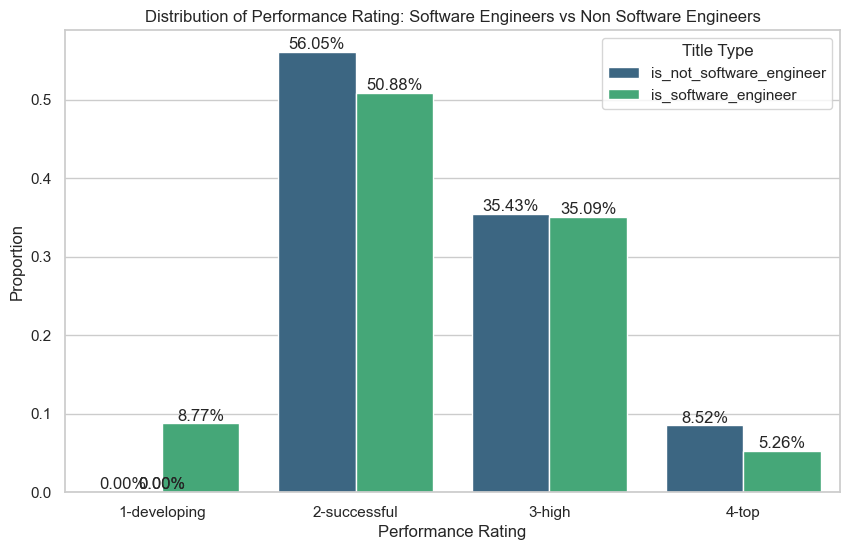

In [ ]:
# Set the style of the plot
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=performance_df,
                       x='performance_rating',
                       y='proportion',
                       hue='type',
                       palette='viridis')

# Add title and axis labels
plt.title('Distribution of Performance Rating: Software Engineers vs Non Software Engineers')
plt.xlabel('Performance Rating')
plt.ylabel('Proportion')

# Add labels above the bars with correct alignment
for p in bar_plot.patches:
    height = p.get_height()  
    bar_plot.annotate(f"{height:.2%}", 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='bottom')

# Display the plot
plt.legend(title='Title Type')

plt.show()

In [ ]:
# For those labeled as "developing," most are early career and "in test":
print(df_blizzard_salary_vf.loc[
    df_blizzard_salary_vf['adjusted_title'].str.contains(r'software engineer') & 
    (df_blizzard_salary_vf['performance_rating'] == '1-developing'), 
    ['adjusted_title', 'current_salary', 'performance_rating', 'percent_incr']])

                  adjusted_title  current_salary performance_rating  \
226  associate software engineer       80,000.00       1-developing   
245  associate software engineer       83,000.00       1-developing   
340    software engineer in test      116,000.00       1-developing   
391   senior software engineer i      135,219.00       1-developing   
415   senior software engineer i      147,500.00       1-developing   

     percent_incr  
226          0.00  
245          3.00  
340          0.00  
391          0.00  
415          0.00  


##### Salary Comparison with Market Data
 How do Blizzard salaries compare to market rates?
 I tried to find salary ranges for software engineers in the United States in 2020:

 Software engineer salary range by year of experience [7].

 | Job Level/Title                            |  Years of Experience           | Base Salary Range
 | :-----------------------:                  |:-----------------------:       |:-----------------------:
 | Entry/Junior-level software engineer       | 0-3                            | $60-100k
 | Mid-level software engineer                | 3-5                            | $80-130k
 | Senior software engineer                   | 5-7                            | $100-140k
 | Principal sofware engineer                 | 7+                             | $130-200k

In [ ]:
# Create a new column 'software_engineer_group'
df_blizzard_salary_vf['software_engineer_group'] = df_blizzard_salary_vf['adjusted_title']

# Order of columns in the DataFrame
colunas = ['timestamp', 'status', 'current_title', 'adjusted_title', 'software_engineer_group',
       'current_salary', 'adjusted_salary', 'salary_type', 'percent_incr',
       'other_info', 'location', 'performance_rating']

df_blizzard_salary_vf = df_blizzard_salary_vf.reindex(colunas, axis=1)

In [ ]:
# Function to Adjust Salary Based on Type
def software_engineer_group(row):
    if row['software_engineer_group'] == 'associate software engineer' or row['software_engineer_group'] == 'associate software engineer in test':
        return '1_se_entry'
    elif row['software_engineer_group'] == 'software engineer' or row['software_engineer_group'] == 'software engineer in test':
        return '2_se_mid'
    elif row['software_engineer_group'] == 'senior software engineer' or row['software_engineer_group'] == 'senior software engineer in test i' or row['software_engineer_group'] == 'senior software engineer i' or row['software_engineer_group'] == 'senior software engineer ii':
        return '3_se_senior'
    elif row['software_engineer_group'] == 'principal software engineer i' or row['software_engineer_group'] == 'principal software engineer':
        return '4_se_principal'
    else:
        return 'other_title'
    
df_blizzard_salary_vf['software_engineer_group'] = df_blizzard_salary_vf.apply(software_engineer_group, axis=1)

When comparing salaries between Blizzard's software engineering titles and those found in online research, we have the following results:

 **Entry / Junior level Software Engineer:**
 - The lowest reported salary for entry-level employees at Blizzard is higher than found online (79k vs. 60k [+31.67%]).
 The highest value matches what was found online (100k vs. 100k [+0%]).

 **Mid-level Software Engineer:**
 - For mid-level positions, Blizzard's lowest salary is 25% higher than found online (100k vs. 80k [+25.00%]),
 and the highest is similar (~137k vs. 130k [+5.38%]).

 **Senior Software Engineer:**
 - At the senior level, Blizzard's lowest salary is also higher by 20% (120k vs. 100k [+20.00%]).
 However, at the upper limit, the difference is nearly 30% (180k vs. 140k [+28.57%]).

 **Principal Software Engineer:**
 - The principal software engineer role shows the largest discrepancy at the lower limit (186k vs. 130k [+43.08%]). At the upper range, the difference is smaller (216k vs. 200k [+8.00%]).

In [ ]:
# Describe salary distribution by software engineer title
df_blizzard_salary_vf.groupby(df_blizzard_salary_vf['software_engineer_group'])['adjusted_salary'].describe()

,count,mean,std,min,25%,50%,75%,max
software_engineer_group,,,,,,,,
1_se_entry,12.00,"85,933.37","7,069.41","79,000.00","80,372.00","82,902.50","88,500.00","100,000.00"
2_se_mid,24.00,"112,755.20","8,602.59","100,000.00","107,250.00","113,453.70","117,750.00","136,780.00"
3_se_senior,38.00,"148,312.28","17,323.37","120,000.00","135,000.00","144,585.27","164,000.00","180,000.00"
4_se_principal,4.00,"201,214.00","12,835.23","186,000.00","195,000.00","201,000.00","207,214.00","216,856.00"
other_title,312.00,"74,281.92","31,752.07","28,000.00","49,000.00","66,019.00","97,113.00","185,000.00"


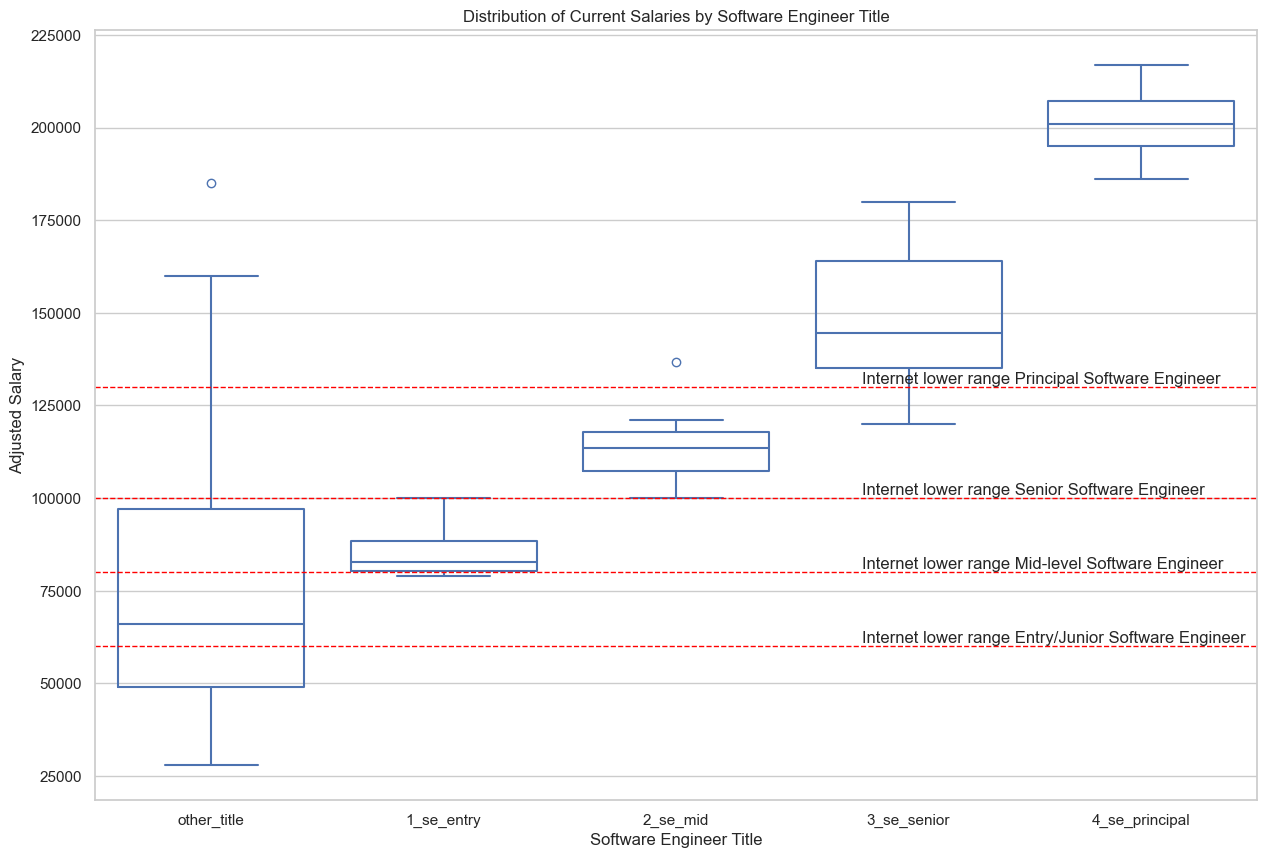

In [ ]:
# Visualization of current salary distributions using violin plots
fig, axs = plt.subplots(1, 1, figsize = (15, 10))

axs = sns.boxplot(y=df_blizzard_salary_vf['adjusted_salary'],
                  x=df_blizzard_salary_vf['software_engineer_group'],
                  fill=False)

axs.axhline(60000, color='red', linestyle='--', linewidth=1)
axs.text(2.8, 61000, 'Internet lower range Entry/Junior Software Engineer', ha='left')

axs.axhline(80000, color='red', linestyle='--', linewidth=1)
axs.text(2.8, 81000, 'Internet lower range Mid-level Software Engineer', ha='left')

axs.axhline(100000, color='red', linestyle='--', linewidth=1)
axs.text(2.8, 101000, 'Internet lower range Senior Software Engineer', ha='left')

axs.axhline(130000, color='red', linestyle='--', linewidth=1)
axs.text(2.8, 131000, 'Internet lower range Principal Software Engineer', ha='left')

plt.title('Distribution of Current Salaries by Software Engineer Title')
plt.xlabel('Software Engineer Title')
plt.ylabel('Adjusted Salary')

plt.show()

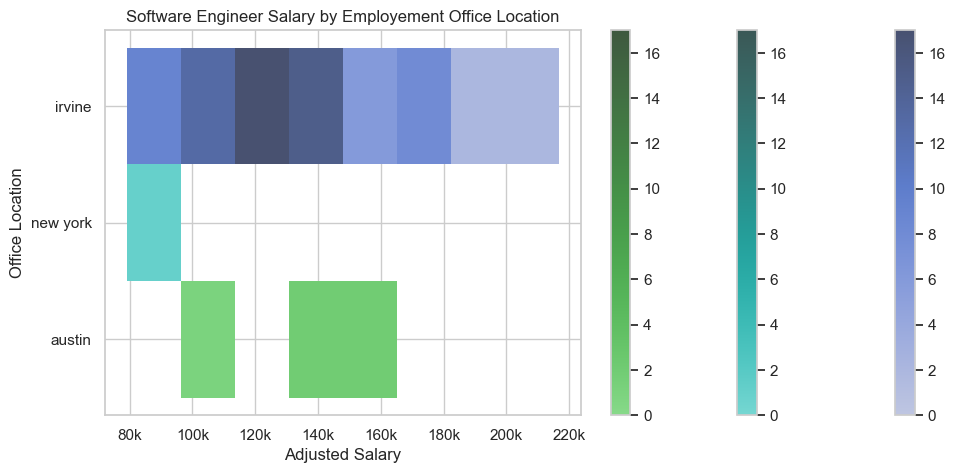

In [ ]:
# Histogram of software engineer salaries by location
se_filtered = df_blizzard_salary_vf[df_blizzard_salary_vf['adjusted_title'].str.contains(r'software engineer')]

fig, axs = plt.subplots(1, 1, figsize = (12, 5))

sns.histplot(data=se_filtered,
             x='adjusted_salary', 
             y='location',
             hue='location',
             multiple='stack',
             palette='viridis',
             cbar=True,
             legend=False)

axs.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.title('Software Engineer Salary by Employement Office Location')
plt.xlabel('Adjusted Salary')
plt.ylabel('Office Location')

plt.show()

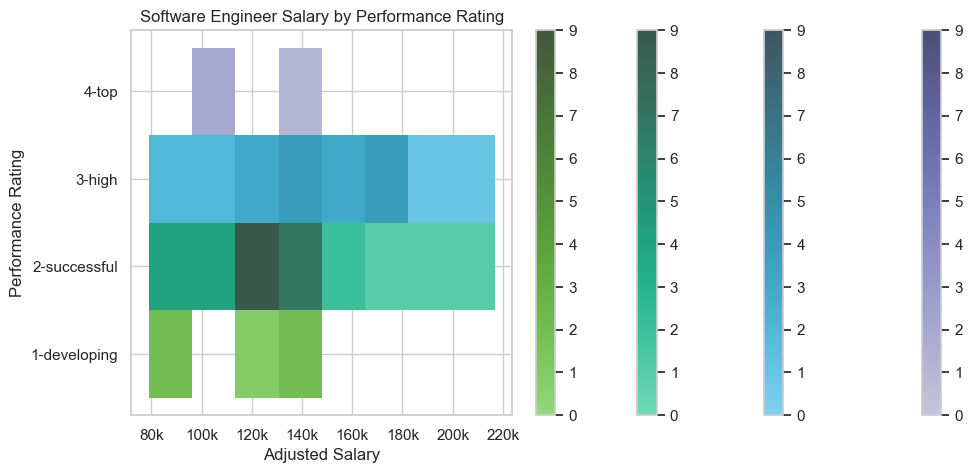

In [ ]:
# Histogram of software engineer salaries by performance rating
se_filtered = df_blizzard_salary_vf[df_blizzard_salary_vf['adjusted_title'].str.contains(r'software engineer')]
se_filtered = se_filtered.sort_values(by='performance_rating', ascending=False)

fig, axs = plt.subplots(1, 1, figsize = (12, 5))

sns.histplot(data=se_filtered,
             x='adjusted_salary', 
             y='performance_rating',
             hue='performance_rating',
             multiple='stack',
             palette='viridis',
             cbar=True,
             legend=False)

axs.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.title('Software Engineer Salary by Performance Rating')
plt.xlabel('Adjusted Salary')
plt.ylabel('Performance Rating')

plt.show()

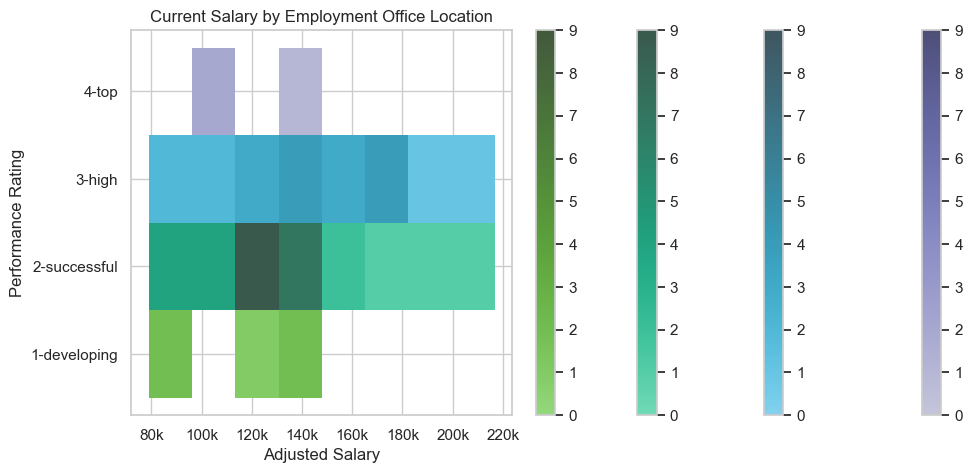

In [ ]:
# Correlation between salary and performance rating
filtered_data = df_blizzard_salary_vf[df_blizzard_salary_vf['adjusted_title'].str.contains(r'software engineer', case=False)]
filtered_data = filtered_data.sort_values(by='performance_rating', ascending=False)

fig, axs = plt.subplots(1, 1, figsize=(12, 5))

sns.histplot(
    data=filtered_data,
    x='adjusted_salary', 
    y='performance_rating',
    hue='performance_rating',
    multiple='stack',
    palette='viridis',
    cbar=True,
    legend=False
)

# Formatando o eixo X para abreviar em milhares (k)
axs.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.title('Current Salary by Employment Office Location')
plt.xlabel('Adjusted Salary')
plt.ylabel('Performance Rating')

plt.show()

### **Conclusion:**
 **Competitive Starting Salaries:** Blizzard offers higher entry-level salaries than the general market, with a 31.67% premium at the lower end.
 This could reflect a strategy to attract fresh talent and ensure new engineers see Blizzard as a competitive employer from the start.

 **Sustained Mid-Level Competitiveness:** For mid-level engineers, Blizzard maintains a salary advantage, particularly on the lower end (+25%).
 This might indicate an emphasis on retaining mid-career professionals, as this experience level often brings critical technical expertise and operational knowledge without the full cost of seniority.

 **Senior Level Premiums Reflect Increased Value:** At the senior level, Blizzard’s salary range continues to outpace the market, especially at the upper limit (+28.57%).
 This suggests that Blizzard is willing to invest in experienced engineers who bring strategic value, likely due to the higher impact of their work on core products and teams.

 **Substantial Principal Level Premiums at Lower Range:** The principal engineer role shows the largest salary difference on the lower end (+43.08%), suggesting Blizzard is competitive in attracting high-level engineering talent.
 The smaller discrepancy at the upper range (+8%) may indicate Blizzard aligns top-end principal salaries with the broader market, possibly reflecting an industry standard at this level.

### **Limitations:**

Despite the conclusions drawn from the analyses,
it is important to exercise caution when interpreting and extrapolating the results,
as there are some limitations:

**Sample Bias:** The data might not represent the entire Blizzard employee population.
Participation in the anonymous survey may have been skewed towards specific demographics or job roles.

**External Market Data:** Salary ranges from the tech industry were used for comparison with Blizzard's salaries.
However, the accuracy of the salary data from this source is uncertain, which may affect the reliability of the analysis.

## **References**

1. [Wikipedia, 2024](https://en.wikipedia.org/wiki/Blizzard_Entertainment)
2. [Time, 2020](https://time.com/5875371/blizzard-wage-disaparities/)
3. [Bloomberg, 2020](https://www.bloomberg.com/news/articles/2020-08-03/blizzard-workers-share-salaries-in-revolt-over-wage-disparities)
4. [OpenInto, 2020](https://www.openintro.org/data/index.php?data=blizzard_salary)
5. [Kaggle, 2024](https://www.kaggle.com/datasets/mexwell/blizzard-employee-voluntary-salary-info)
6. [Ellow, 2024](https://ellow.io/contract-work-vs-full-time-employment/)
7. [IT Career Finder, 2023](https://www.itcareerfinder.com/brain-food/it-salaries/computer-software-engineer-salary-range.html)